### Import Libaries



In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#Libraries for linear regression model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

%matplotlib inline

### Check out the data

In [4]:
startUps = pd.read_csv('Startups.csv')

In [5]:
startUps.head()

,Company,Valuation,Valuation_date,Industry,Country
0,ByteDance,140.0,April-21,Internet,China
1,SpaceX,100.0,October-21,Aerospace,United States
2,Stripe,95.0,March-21,Financial services,United States / Ireland
3,Klarna,45.6,June-21,Fintech,Sweden
4,Canva,40.0,September-21,Graphic design,Australia


In [6]:
startUps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Company         250 non-null    object 
 1   Valuation       250 non-null    float64
 2   Valuation_date  250 non-null    object 
 3   Industry        233 non-null    object 
 4   Country         250 non-null    object 
dtypes: float64(1), object(4)
memory usage: 9.9+ KB


In [7]:
startUps.describe() #Valuation in Billions USD

,Valuation
count,250.000000
mean,7.820840
std,13.465775
min,2.100000
25%,3.000000
50%,4.025000
75%,7.400000
max,140.000000


## Data Visualization

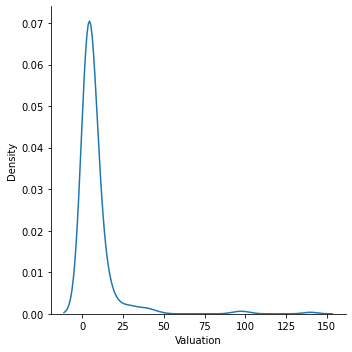

In [8]:
sns.displot(startUps['Valuation'],kind='kde')

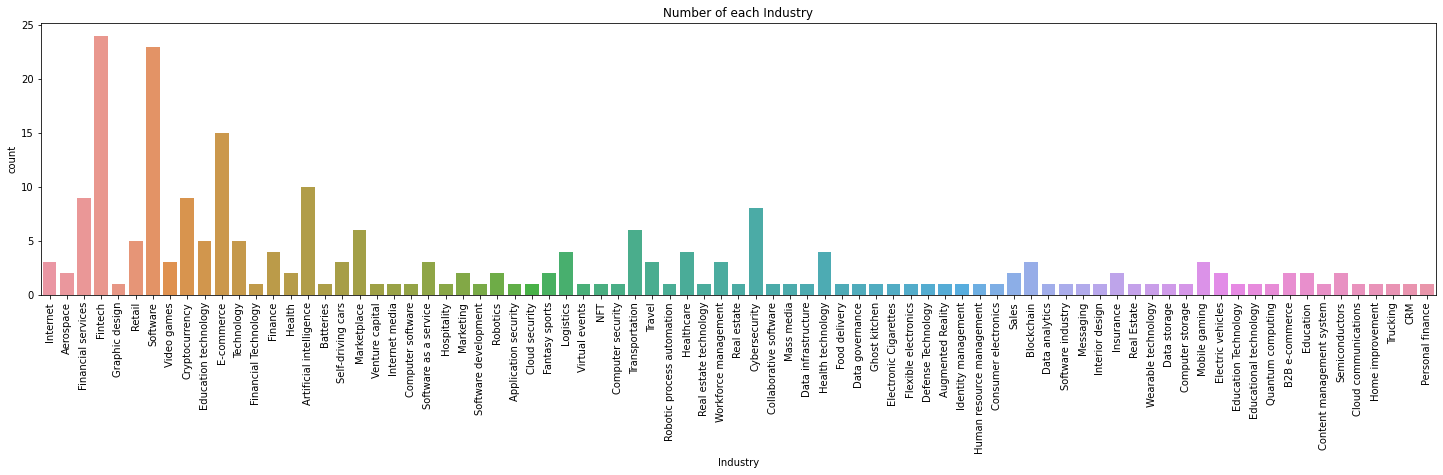

In [9]:
tmp = startUps[['Company','Industry']]
plt.subplots(figsize=(25,5))
sns.countplot(data=tmp,x='Industry')
plt.xticks(rotation=90)
plt.title('Number of each Industry')
plt.show()

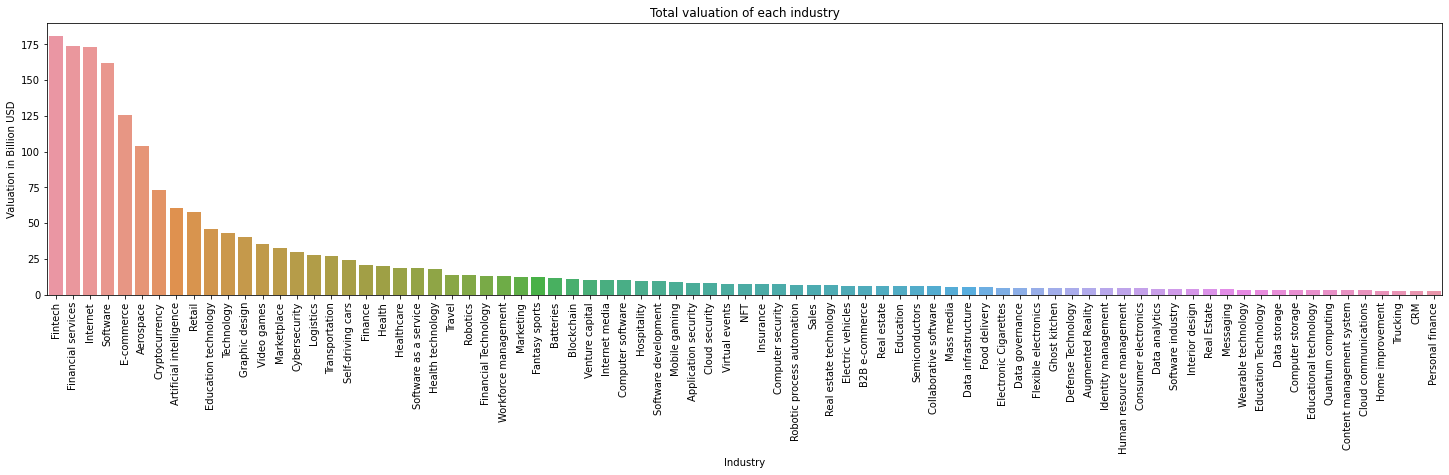

In [10]:
tmp = startUps[['Industry','Valuation']].groupby('Industry').sum().reset_index().sort_values(by='Valuation',ascending=False)
plt.subplots(figsize=(25,5))
sns.barplot(data=tmp,x='Industry',y='Valuation')
plt.xticks(rotation=90)
plt.title('Total valuation of each industry')
plt.ylabel('Valuation in Billion USD')
plt.show()

###  Column names

In [11]:
print(startUps.columns)

Index(['Company', 'Valuation', 'Valuation_date', 'Industry', 'Country'], dtype='object')


In [20]:
X = startUps[['Industry', 'Country']]
y = startUps['Valuation']

print(X.shape)
print(y.shape)

(250, 2)
(250,)


In [21]:
print(X)
print(y)
#print(X.shape)
#print(y.shape)

                    Industry                     Country
0                   Internet                       China
1                  Aerospace               United States
2         Financial services    United States /  Ireland
3                    Fintech                      Sweden
4             Graphic design                   Australia
..                       ...                         ...
245           Cryptocurrency                      Mexico
246                      NaN    Brazil /   United States
247               E-commerce                 South Korea
248                  Fintech               United States
249  Artificial intelligence               United States

[250 rows x 2 columns]
0      140.00
1      100.00
2       95.00
3       45.60
4       40.00
        ...  
245      2.20
246      2.20
247      2.20
248      2.17
249      2.10
Name: Valuation, Length: 250, dtype: float64


## Need to encode string attributes

https://stackoverflow.com/questions/34007308/linear-regression-analysis-with-string-categorical-features-variables
https://towardsdatascience.com/guide-to-encoding-categorical-features-using-scikit-learn-for-machine-learning-5048997a5c79
Need to encode attributes and change the input to categorical data

In [22]:
startUps.head()

,Company,Valuation,Valuation_date,Industry,Country
0,ByteDance,140.0,April-21,Internet,China
1,SpaceX,100.0,October-21,Aerospace,United States
2,Stripe,95.0,March-21,Financial services,United States / Ireland
3,Klarna,45.6,June-21,Fintech,Sweden
4,Canva,40.0,September-21,Graphic design,Australia


In [23]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse=False)
#categories to encode: industry, country


In [42]:
ohe.fit_transform(startUps[['Country']])

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [40]:
ohe.categories_

[array(['\xa0Argentina', '\xa0Australia',
        '\xa0Australia\xa0/\xa0\xa0Hong Kong', '\xa0Austria',
        '\xa0Bahamas', '\xa0Belgium', '\xa0Brazil', '\xa0Canada',
        '\xa0China', '\xa0China\xa0/\xa0\xa0Hong Kong',
        '\xa0China\xa0/\xa0\xa0United States', '\xa0Colombia',
        '\xa0Estonia', '\xa0France',
        '\xa0France\xa0/\xa0\xa0United States', '\xa0Germany',
        '\xa0Hong Kong\xa0/\xa0\xa0China', '\xa0India',
        '\xa0India\xa0/\xa0\xa0United States', '\xa0Indonesia',
        '\xa0Israel', '\xa0Israel\xa0/\xa0\xa0United States', '\xa0Japan',
        '\xa0Lithuania', '\xa0Mexico', '\xa0Netherlands',
        '\xa0Portugal\xa0/\xa0\xa0United States', '\xa0South Korea',
        '\xa0Sweden', '\xa0Turkey', '\xa0United Kingdom',
        '\xa0United Kingdom\xa0/\xa0\xa0UAE',
        '\xa0United Kingdom\xa0/\xa0\xa0United States',
        '\xa0United States', '\xa0United States\xa0/\xa0\xa0Ireland',
        '\xa0\xa0Argentina', '\xa0\xa0Australia', '\xa0\xa0

In [44]:
from sklearn.compose import make_column_transformer


In [46]:
column_trans = make_column_transformer(OneHotEncoder(),['Industry', 'Country'], remainder='passthrough')

In [47]:
column_trans.fit_transform(X)

In [16]:
#pd.get_dummies(startUps['Industry']).head() #not good approach, will use encoder

#encode each colum
#ohe = OneHotEncoder(sparse = False)
#applying OneHotEncoder to Industry colum
#ohe.fit_transform(startUps[['Industry']])[:5]
#ohe.categories_


In [80]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1) #90% of data is training data



In [81]:
#linReg = LinearRegression()
#linReg.fit(X_train,y_train)
#regr = LinearRegression()
#regr.fit(X_train,y_train)

### Model Evaluation
 